In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nutritional-health-survey-dataset/Train_Data.csv
/kaggle/input/nutritional-health-survey-dataset/Test_Data.csv


In [87]:
df=pd.read_csv('/kaggle/input/nutritional-health-survey-dataset/Train_Data.csv')

In [88]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [89]:
df.columns=['ID','Gender','Physical Activity','BMI','Glucose Level','Diabetes','Glucose Tolerance','Insulin Level','Age']

In [90]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level,Age
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


<Axes: >

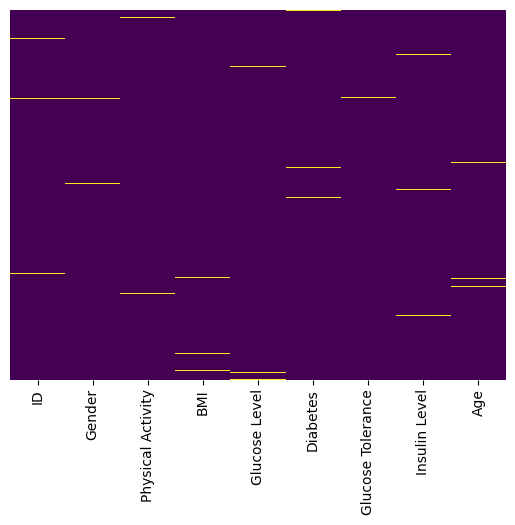

In [91]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [92]:
cols=['Gender','Physical Activity','BMI','Glucose Level','Diabetes','Glucose Tolerance','Insulin Level','Age']
df=df[cols]

In [93]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level,Age
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [94]:
df.isna().sum()

Gender               18
Physical Activity    13
BMI                  18
Glucose Level        13
Diabetes             18
Glucose Tolerance    11
Insulin Level         9
Age                  14
dtype: int64

In [95]:
df.shape

(1966, 8)

In [96]:
df.dropna(inplace=True)
df.isna().sum()

Gender               0
Physical Activity    0
BMI                  0
Glucose Level        0
Diabetes             0
Glucose Tolerance    0
Insulin Level        0
Age                  0
dtype: int64

In [97]:
df.shape

(1852, 8)

In [98]:
df


,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level,Age
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
5,1.0,2.0,23.6,110.0,2.0,100.0,6.08,Adult
...,...,...,...,...,...,...,...,...
1960,1.0,2.0,22.5,98.0,2.0,79.0,3.51,Adult
1961,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult


In [99]:
from sklearn.preprocessing import OrdinalEncoder

In [100]:
age=['Adult','Senior']
enc=OrdinalEncoder(categories=[age])

In [101]:
df['Age']=enc.fit_transform(df[['Age']]).astype(str)

In [102]:
df

,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level,Age
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0.0
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0.0
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0.0
5,1.0,2.0,23.6,110.0,2.0,100.0,6.08,0.0
...,...,...,...,...,...,...,...,...
1960,1.0,2.0,22.5,98.0,2.0,79.0,3.51,0.0
1961,2.0,2.0,33.5,100.0,2.0,73.0,6.53,0.0
1962,1.0,2.0,30.0,93.0,2.0,208.0,13.02,0.0
1963,1.0,2.0,23.7,103.0,2.0,124.0,21.41,0.0


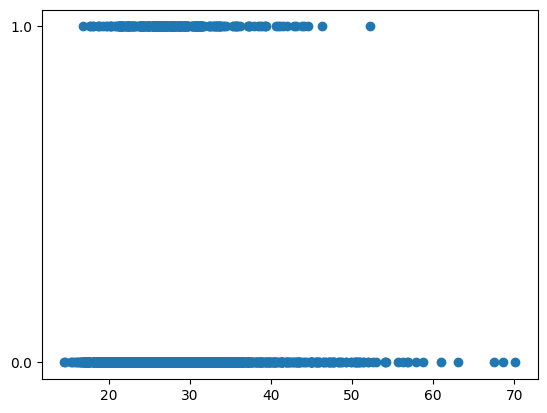

In [103]:
plt.scatter(df['BMI'],df['Age'])

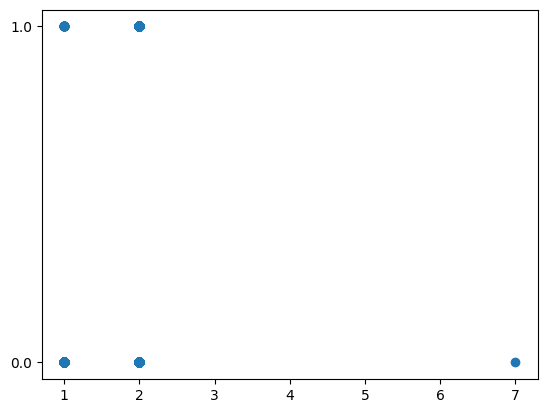

In [104]:
plt.scatter(df['Physical Activity'],df['Age'])

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [106]:
columns=['Gender','Physical Activity','BMI','Glucose Level','Diabetes','Glucose Tolerance','Insulin Level']
X=df[columns]
Y=df['Age']

In [107]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [108]:
scaler=StandardScaler()
Xtrainscale=scaler.fit_transform(Xtrain)
Xtestscale=scaler.transform(Xtest)

In [109]:
model=LogisticRegression(penalty='l1',solver='liblinear',max_iter=10000,C=0.1)

In [110]:
model.fit(Xtrainscale,Ytrain)

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear')

In [111]:
Ypred=model.predict(Xtestscale)

In [112]:
acc=accuracy_score(Ytest,Ypred)
print(acc)

0.816711590296496


In [113]:
test=pd.read_csv('/kaggle/input/nutritional-health-survey-dataset/Test_Data.csv')

In [114]:
test.head()
test.columns=['ID','Gender','Physical Activity','BMI','Glucose Level','Diabetes','Glucose Tolerance','Insulin Level']
test.head()

,ID,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [115]:
test=test[columns]
test

,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level
0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...
307,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,2.0,2.0,22.5,82.0,2.0,93.0,1.39


<Axes: >

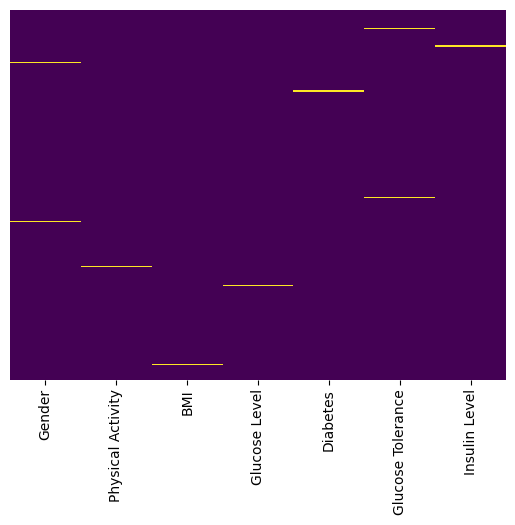

In [116]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [117]:
test['Gender']=test['Gender'].fillna(test['Gender'].median())

In [118]:
test['Physical Activity']=test['Physical Activity'].fillna(test['Physical Activity'].median())
test['BMI']=test['BMI'].fillna(test['BMI'].median())
test['Glucose Level']=test['Glucose Level'].fillna(test['Glucose Level'].median())
test['Diabetes']=test['Diabetes'].fillna(test['Diabetes'].median())
test['Glucose Tolerance']=test['Glucose Tolerance'].fillna(test['Glucose Tolerance'].median())
test['Insulin Level']=test['Insulin Level'].fillna(test['Insulin Level'].median())

In [119]:
test.isna().sum()

Gender               0
Physical Activity    0
BMI                  0
Glucose Level        0
Diabetes             0
Glucose Tolerance    0
Insulin Level        0
dtype: int64

In [120]:
test.shape

(312, 7)

In [121]:
test.head()

,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level
0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [122]:
Xtestf=test[columns]

In [123]:
Xtestfscale=scaler.transform(Xtestf)

In [124]:
Ypredict=model.predict(Xtestfscale)

In [125]:
sub_new=pd.DataFrame({'age_group':Ypredict})

In [126]:
sub_new.to_csv('sub_new.csv',index=False)

In [127]:
sub_new.to_csv("fixed_submission.csv", index=False, encoding="utf-8")


In [128]:
testn=pd.read_csv('/kaggle/input/nutritional-health-survey-dataset/Test_Data.csv')

In [129]:
testn.isna().sum()

SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

In [130]:
testn.columns=['ID','Gender','Physical Activity','BMI','Glucose Level','Diabetes','Glucose Tolerance','Insulin Level']
testn.head()

,ID,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [131]:
testn=testn[columns]
testn

,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level
0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...
307,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,2.0,2.0,22.5,82.0,2.0,93.0,1.39


In [132]:
testn['Gender']=testn['Gender'].fillna(df['Gender'].median())
testn['Physical Activity']=testn['Physical Activity'].fillna(df['Physical Activity'].median())
testn['BMI']=testn['BMI'].fillna(df['BMI'].mean())
testn['Glucose Level']=testn['Glucose Level'].fillna(df['Glucose Level'].mean())
testn['Diabetes']=testn['Diabetes'].fillna(df['Diabetes'].median())
testn['Glucose Tolerance']=testn['Glucose Tolerance'].fillna(df['Glucose Tolerance'].mean())
testn['Insulin Level']=testn['Insulin Level'].fillna(df['Insulin Level'].mean())

In [133]:
testn.isna().sum()

Gender               0
Physical Activity    0
BMI                  0
Glucose Level        0
Diabetes             0
Glucose Tolerance    0
Insulin Level        0
dtype: int64

In [134]:
Xtestn=testn[columns]

In [135]:
Xtestnscale=scaler.transform(Xtestn)

In [136]:
Ypredn=model.predict(Xtestnscale)

In [137]:
new_sub=pd.DataFrame({'age_group':Ypredn})

In [138]:
new_sub.to_csv("newsub.csv",index=False)

In [139]:
newmodel=LogisticRegression(class_weight='balanced')

In [140]:
newmodel.fit(Xtrainscale,Ytrain)

LogisticRegression(class_weight='balanced')

In [141]:
Yfpred=newmodel.predict(Xtestscale)

In [142]:
accf=accuracy_score(Ytest,Yfpred)
print(accf)

0.6900269541778976


In [143]:
Ypredfinal=newmodel.predict(Xtestnscale)

finalsub=pd.DataFrame({'age_group':Ypredfinal})
finalsub.to_csv("Finalsub.csv",index=False)

In [144]:
import joblib
joblib.dump(scaler,'Scaler.pkl')

['Scaler.pkl']

In [145]:
joblib.dump(newmodel,'National Health Survey Model Final.pkl')

['National Health Survey Model Final.pkl']

In [146]:
df

,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level,Age
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0.0
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0.0
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0.0
5,1.0,2.0,23.6,110.0,2.0,100.0,6.08,0.0
...,...,...,...,...,...,...,...,...
1960,1.0,2.0,22.5,98.0,2.0,79.0,3.51,0.0
1961,2.0,2.0,33.5,100.0,2.0,73.0,6.53,0.0
1962,1.0,2.0,30.0,93.0,2.0,208.0,13.02,0.0
1963,1.0,2.0,23.7,103.0,2.0,124.0,21.41,0.0


In [147]:
mean=df.groupby('Age')['Glucose Tolerance'].mean()
mean

Age
0.0    110.034194
1.0    140.665563
Name: Glucose Tolerance, dtype: float64

In [148]:
df['BMIxInsulin']=df['BMI']*df['Insulin Level']

In [149]:
df

,Gender,Physical Activity,BMI,Glucose Level,Diabetes,Glucose Tolerance,Insulin Level,Age,BMIxInsulin
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0.0,532.287
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0.0,78.155
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0,142.448
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0.0,392.028
5,1.0,2.0,23.6,110.0,2.0,100.0,6.08,0.0,143.488
...,...,...,...,...,...,...,...,...,...
1960,1.0,2.0,22.5,98.0,2.0,79.0,3.51,0.0,78.975
1961,2.0,2.0,33.5,100.0,2.0,73.0,6.53,0.0,218.755
1962,1.0,2.0,30.0,93.0,2.0,208.0,13.02,0.0,390.600
1963,1.0,2.0,23.7,103.0,2.0,124.0,21.41,0.0,507.417


In [150]:
mean=df.groupby('Age')['BMIxInsulin'].median()
mean

Age
0.0    242.9040
1.0    230.6185
Name: BMIxInsulin, dtype: float64

In [151]:
lastsub=pd.DataFrame({'age_group':Ypredfinal})
lastsub.to_csv("last_sub.csv",index=False)